In [1]:
!pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [3]:
# Constants
A = np.array([[2, -3, 1], [3, 1, 3], [-5, 2, -4]])
B = np.array([[3.5488, 15.593, 8.5775, -4.0123], [2.3595, 24.524, 14.596, -5.8157], [0.0899, 27.599, 21.438, -5.8415], [1.9227, 55.667, 39.717, -10.558]])
epsilon = 10e-8

In [4]:
# n-dependent C matrix
print("Choose the size of matrix C: ")
C_n = input()
C_n = int(C_n)
C = np.zeros((C_n, C_n))
for i in range (C_n):
    for j in range(C_n):
        C[i][j] = np.sin(i*j)

Choose the size of matrix C: 


 5


In [5]:
def qr_without_shift(matrix):
    A_ = []
    q_ = []
    r_ = []
    delta_ = []
    max_eig = []
    
    iteration = 0
    delta = 100 #to start iterating
    n = len(matrix)
    A_.append(scipy.linalg.hessenberg(matrix))
    while delta >= epsilon:
        q_.append(scipy.linalg.qr(A_[iteration])[0])
        r_.append(scipy.linalg.qr(A_[iteration])[1])
        A_.append(np.matmul(r_[iteration], q_[iteration]))
        delta = 0
        for i in range (2, n+1):
            delta += abs(A_[iteration][i-1][i-2])
        delta_.append(delta)
        max_eig.append(np.max(np.diagonal(A_[iteration])))
        iteration += 1
    return iteration, delta, A_[-1], np.diagonal(A_[-1]),  delta_, max_eig

#Change A_[-1] to A_ to show all iterations of the matrix

In [6]:
def qr_with_shift(matrix):
    A_ = []
    A__ = []
    q_ = []
    r_ = []
    gamma = []
    delta_ = []
    max_eig = []
    
    iteration = 0
    delta = 100 #to start iterating
    n = len(matrix)
    A_.append(scipy.linalg.hessenberg(matrix))
    while delta >= epsilon:
        gamma.append(A_[iteration][n-1][n-1])
        q_.append(scipy.linalg.qr(A_[iteration] - gamma[iteration]*np.identity(n))[0])
        r_.append(scipy.linalg.qr(A_[iteration] - gamma[iteration]*np.identity(n))[1])
        A_.append(np.matmul(r_[iteration], q_[iteration]) + gamma[iteration]*np.identity(n))
        delta = 0
        for i in range (2, n+1):
            delta += abs(A_[iteration][i-1][i-2])
        delta_.append(delta)
        max_eig.append(np.max(np.diagonal(A_[iteration])))
        iteration += 1
    return iteration, delta, A_[-1], np.diagonal(A_[-1]), delta_, max_eig

In [7]:
#Task a

print(qr_without_shift(A)[3])
print(qr_without_shift(B)[3])
print(qr_without_shift(C)[3])

print(qr_with_shift(A)[3])
print(qr_with_shift(B)[3])
print(qr_with_shift(C)[3])

#print(qr_without_shift(A)[3])

[-2.00000005e+00  1.00000005e+00 -4.36570461e-15]
[29.96640725  5.9990244   1.999441    0.98792736]
[ 0.         -2.02807946  1.392701    0.99355106 -0.14928894]
[-2.00000005e+00  5.17961032e-08  1.00000000e+00]
[29.96640725  5.9990244   0.98792737  1.99944099]
[ 0.         -2.02807946  1.392701    0.99355106 -0.14928894]


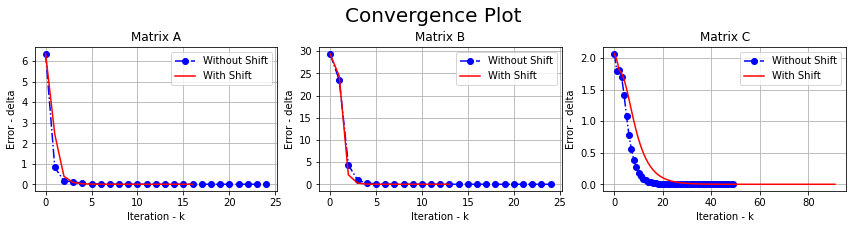

In [8]:
#Task b

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

fig.suptitle('Convergence Plot', fontsize = 20)
fig.tight_layout()

ax1.set_title('Matrix A')
ax2.set_title('Matrix B')
ax3.set_title('Matrix C')

ax1.set_xlabel('Iteration - k')
ax1.set_ylabel('Error - delta')
ax2.set_xlabel('Iteration - k')
ax2.set_ylabel('Error - delta')
ax3.set_xlabel('Iteration - k')
ax3.set_ylabel('Error - delta')

ax1.grid()
ax2.grid()
ax3.grid()

ax1.plot(qr_without_shift(A)[4], 'bo-.', label='Without Shift')
ax1.plot(qr_with_shift(A)[4], 'r', label='With Shift')

ax2.plot(qr_without_shift(B)[4], 'bo-.', label='Without Shift')
ax2.plot(qr_with_shift(B)[4], 'r', label='With Shift')

ax3.plot(qr_without_shift(C)[4], 'bo-.', label='Without Shift')
ax3.plot(qr_with_shift(C)[4], 'r', label='With Shift')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')

fig.show()

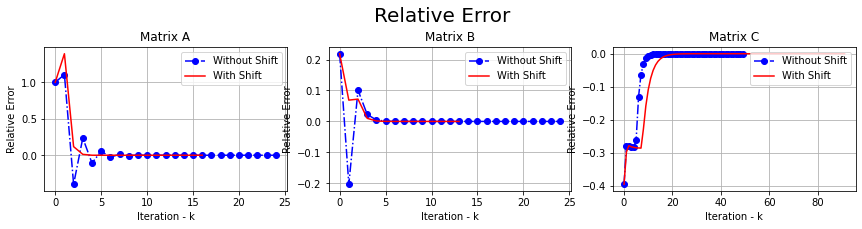

In [9]:
#Task c

max_eig_A = np.max(np.linalg.eig(A)[0])
max_eig_B = np.max(np.linalg.eig(B)[0])
max_eig_C = np.max(np.linalg.eig(C)[0])

without_A = (qr_without_shift(A)[5] - max_eig_A)/max_eig_A
with_A = (qr_with_shift(A)[5] - max_eig_A)/max_eig_A

without_B = (qr_without_shift(B)[5] - max_eig_B)/max_eig_B
with_B = (qr_with_shift(B)[5] - max_eig_B)/max_eig_B

without_C = (qr_without_shift(C)[5] - max_eig_C)/max_eig_C
with_C = (qr_with_shift(C)[5] - max_eig_C)/max_eig_C

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

fig.suptitle('Relative Error', fontsize = 20)
fig.tight_layout()

ax1.set_title('Matrix A')
ax2.set_title('Matrix B')
ax3.set_title('Matrix C')

ax1.set_xlabel('Iteration - k')
ax1.set_ylabel('Relative Error')
ax2.set_xlabel('Iteration - k')
ax2.set_ylabel('Relative Error')
ax3.set_xlabel('Iteration - k')
ax3.set_ylabel('Relative Error')

ax1.grid()
ax2.grid()
ax3.grid()

ax1.plot(without_A, 'bo-.', label='Without Shift')
ax1.plot(with_A, 'r', label='With Shift')

ax2.plot(without_B, 'bo-.', label='Without Shift')
ax2.plot(with_B, 'r', label='With Shift')

ax3.plot(without_C, 'bo-.', label='Without Shift')
ax3.plot(with_C, 'r', label='With Shift')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')

fig.show()